<a href="https://colab.research.google.com/github/SinghNavnoor/Regression_-Prediction_of_Grocery-Sales/blob/main/regression_prediction_of_grocery_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Need a Readme Part on Github.

# **Regression – Prediction of Grocery Sales**
- **Author:** Navnoor Singh Kahlon
- **Last updated:** October 2022
---



## **Loading Data**

In [51]:
#Importing pandas.
import pandas as pd

#Importing warnings.
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Uploading the dataset.
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [53]:
#Displaying the dataset.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
#Looking at any null values and the dtypes of every column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Looks like there are null values in Item_weight and Outlet_size

##**Data Cleaning**

####Number of rows and columns

In [55]:
#Finding the length of the data set. 
len(df)

8523

In [56]:
#Finding the the total number of columns. 
len(df.columns)

12

####Data types of each variable 

In [57]:
#Focusing on data types. 
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Duplicates

In [58]:
#Looking for any duplicate rows in the dataset. 
df.duplicated().sum()

0

No duplicates found

####Identifying Missing Values

In [59]:
#Finding the total number of null values in each column. 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####Focuing on the null values in Item_Weight

In [60]:
#Finding the mean of Item Weight and assigning it to a variable. 
item_weight_ave = df['Item_Weight'].mean()

item_weight_ave

12.857645184135976

In [61]:
#Filling null values in Item Weight wiht the column mean. 
df['Item_Weight'].fillna(item_weight_ave, inplace = True)

####Focusing on the Outlet_Size column

In [62]:
#Finding the number of stores in every size category. 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The Outlet_Size column is an object type. 
It has 2410 null values.
The best way to fill these null values will be using Machine Learning.
For now I will be filling it with .mode() just so that we don't have any null values. 

In [63]:
#Filling null values in Outlet Size with the Mode of that column, i.e. Medium
df['Outlet_Size'].fillna('Medium', inplace = True)

####Confirming that there are no missing values. 

In [64]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

####Looking for any inconsistencies with the columns. 

In [65]:
#Displaying all the columns with there data types. 
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Focusing on every object type columns to see for any inconsistencies. 

In [66]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')
    

The count values for Item_Identifier are:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
-----------------------------------------------

___
The count values for Item_Fat_Content are:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------------------------------------------

___
The count values for Item_Type are:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                 

#####Found inconsistencies with the naming of the Fat Contents like: Low Fat, LF, low fat, reg and regular.

#####Fixing the inconsistencies in Item Fat Content

In [67]:
#Using .replace() method to replace and fix all the inconsistent values. 
df.replace({'Item_Fat_Content': {'LF':'Low Fat',
                                 'low fat': 'Low Fat',
                                 'reg': 'Regular'}}, inplace = True)

In [68]:
#Checking to make sure the .replace() method worked properly. 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####Getting summary stats of each Numerical column. 

In [69]:
#Creating another loop to get the summary stats of Numerical columns. 
from termcolor import colored

for i in all_columns:
  if df[i].dtypes == float:
    m = df[i].mean().round(2)
    max = df[i].max().round(2)
    min = df[i].min().round(2)
    mode = df[i].mode()
    print(colored(f"The {df[i].name}:", attrs=['bold']))
    #print(f"The {df[i].name}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}')
    print('--------------' * 4)
    print('\n')

The Item_Weight:
Mean = 12.86, Max = 21.35, Min = 4.56
--------------------------------------------------------


The Item_Visibility:
Mean = 0.07, Max = 0.33, Min = 0.0
--------------------------------------------------------


The Item_MRP:
Mean = 140.99, Max = 266.89, Min = 31.29
--------------------------------------------------------


The Item_Outlet_Sales:
Mean = 2181.29, Max = 13086.96, Min = 33.29
--------------------------------------------------------




##Exploratory Visuals

In [70]:
#Importing matplot like and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

###Heatmaps for correlation. 

In [71]:
#Calculating the corelation between the columns and assigning it a variable. 
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


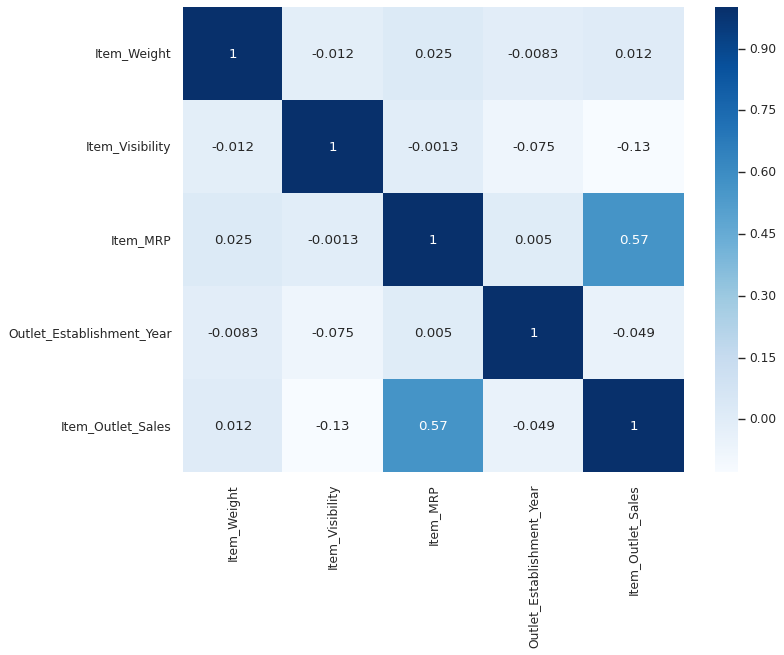

In [72]:
#Graphing the calculated correlation. 
sns.set(rc = {'figure.figsize' : (9,7)});
sns.heatmap(corr, cmap = 'Blues', annot = True);

**Observations:**
- I see that Item_MRP and Item_Outlet Sales have good correlation at 0.57.
- Most other columns have very weak correlation, almost below 0.1, and some even have negative correlation like Item_MRP and Item_Visibility. 

***Observations:***
- We can see that the data is concentrated mostly before x = 200. 
- After x = 200, the data starts to be less concentrated and have more outliers. This would point to the fact that the higher the item's MRP is, the amount of sales it does becomes less predictable. 

###Univariate Exploration

#### Exploring Item_MRP:

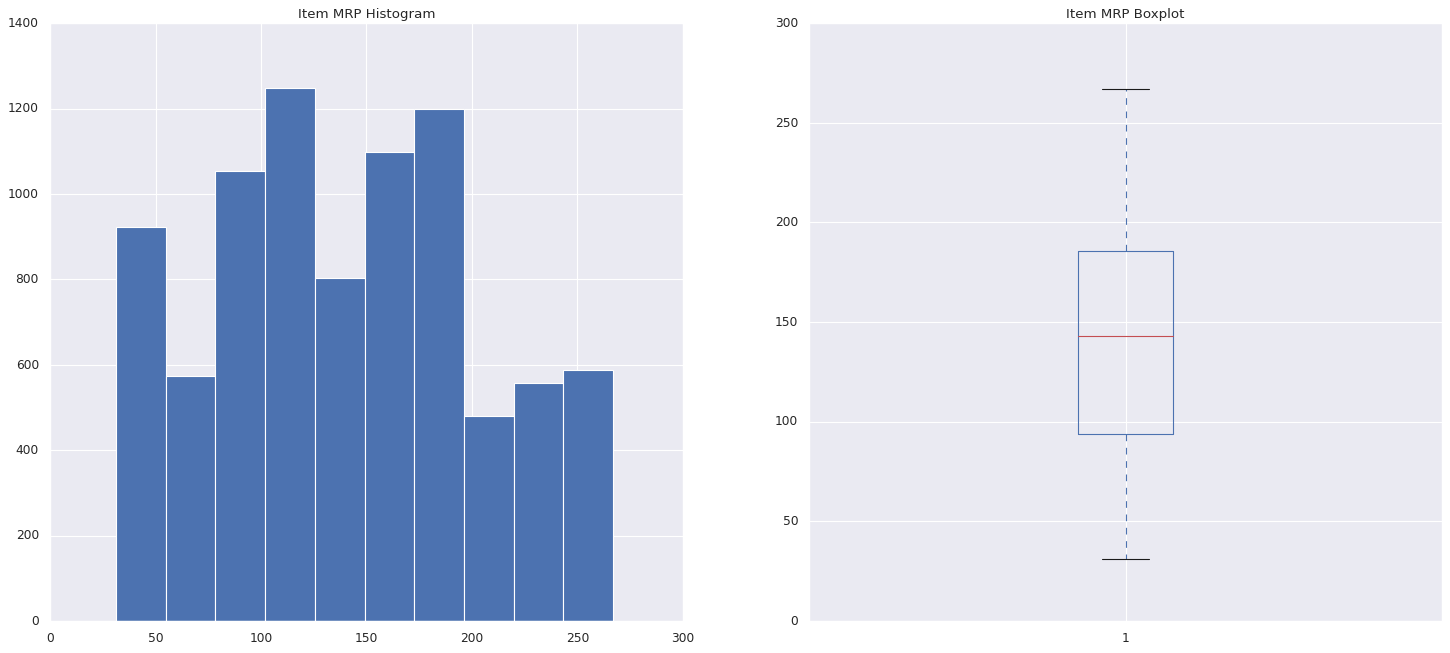

In [73]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['Item_MRP'].values);
plt.title('Item MRP Histogram');

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['Item_MRP'].values);
plt.title('Item MRP Boxplot');

**Item_MRP Observation:** 
- Looking at the Item_MRP histogram, we can see that it is very spread out. There is no skewness or any uniform curve to it. We can also conclude that most of the information is between x = 75 and x = 190. 
- The boxplot shows us that this variable has no outliers. It's mean is around 140.

#### Exploring Item_Outlet_Sales:

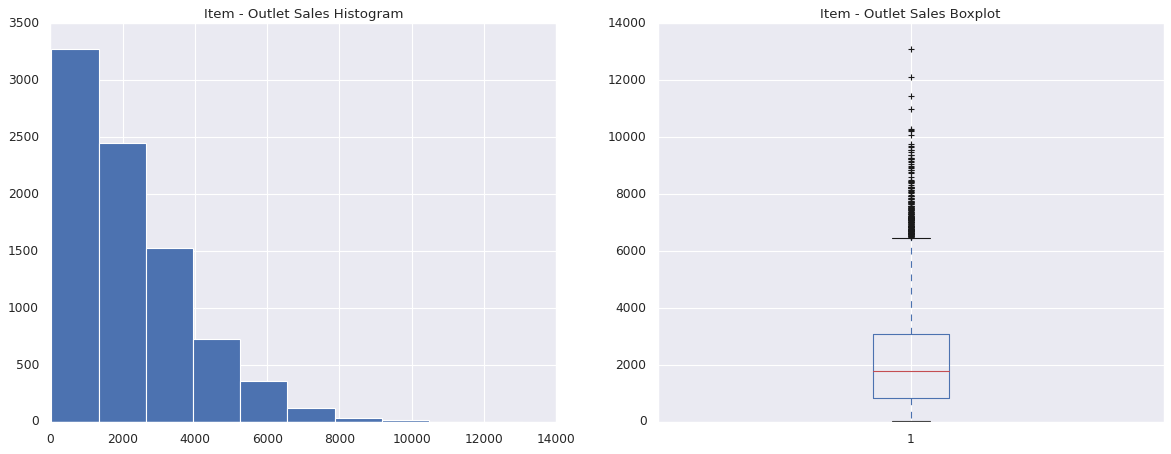

In [74]:
#Setting the figure size:
plt.figure(figsize = (16,6))

#Histogram:
plt.subplot(1,2,1);
plt.hist(df['Item_Outlet_Sales'].values);
plt.title('Item - Outlet Sales Histogram');

#Boxplot:
plt.subplot(1,2,2);
plt.boxplot(df['Item_Outlet_Sales'].values);
plt.title('Item - Outlet Sales Boxplot');

**Item - Outlet Sales Observations:**
- The histogram is heavily right skewed. 
- The boxplot shows us that there are multiple outliers, for example, one of the item did a sale of more than 12000 units. The average sale is around 1900. 

###Multi-Variate Exploration

####Exploring Item Price and Item Outlet Sales

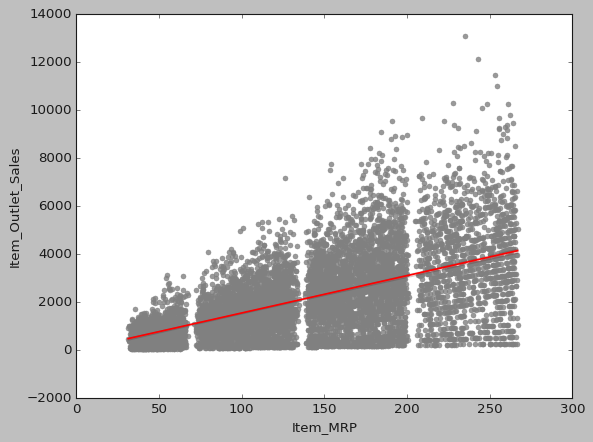

In [75]:
#Setting the figure size: 
sns.set(rc={'figure.figsize':(18,8)})

#Choosing a style for the graph:
plt.style.use('classic')

#Regplot:
sns.regplot(data = df, x = df['Item_MRP'], y = df['Item_Outlet_Sales'], scatter_kws={"color":"grey"}, line_kws={"color":"red"});

####Exploring Item_Fat_Content & Item Outlet Sales:

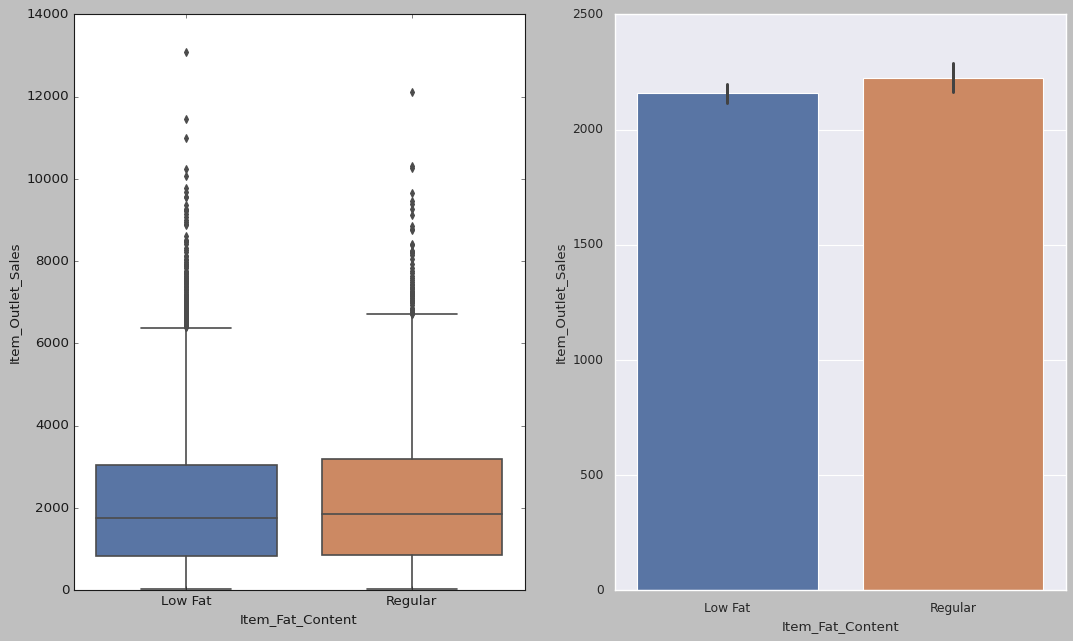

In [76]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (16,9));

#Boxplot
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

#Barplot
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(10,9)})
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

**Observations:**
- In the boxplot, we can see that Low fat content items do have more spread out outliers, including the largest sale. 
- In the boxplot, we can also see that the IQR and maximum sales of Regular fat content items are larger compare to Low fat content items. 
- In the barplot, we can see that on average Regular fat content items sold more than the Low fat content items. 

####Exploring Item Fat Content & Item MRP

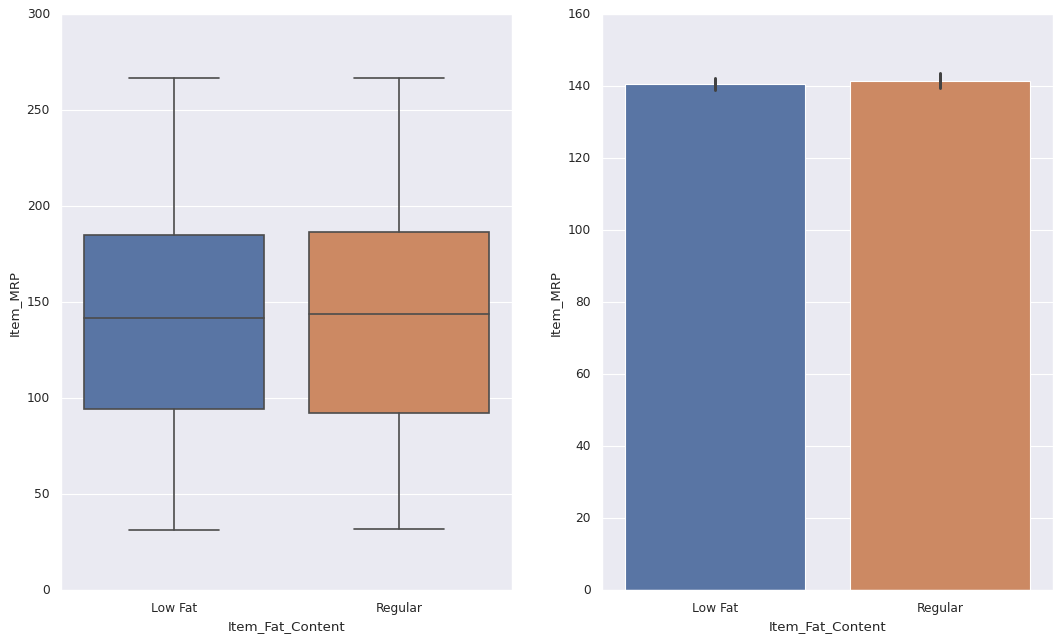

In [77]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (16,9));

#Boxplot
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_MRP');

#Barplot
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(10,9)})
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_MRP');

**Observations:**
- In the boxplot, we can see that the IQR is larger for Regular Fat content items, meaning that some of these items are priced a little lower than the low fat content and others are priced a little higher. 
- In the barplot, we can see that on average Regular fat content items are a little more expensive.  

####Exploring Item Outlet Sales and Location Type

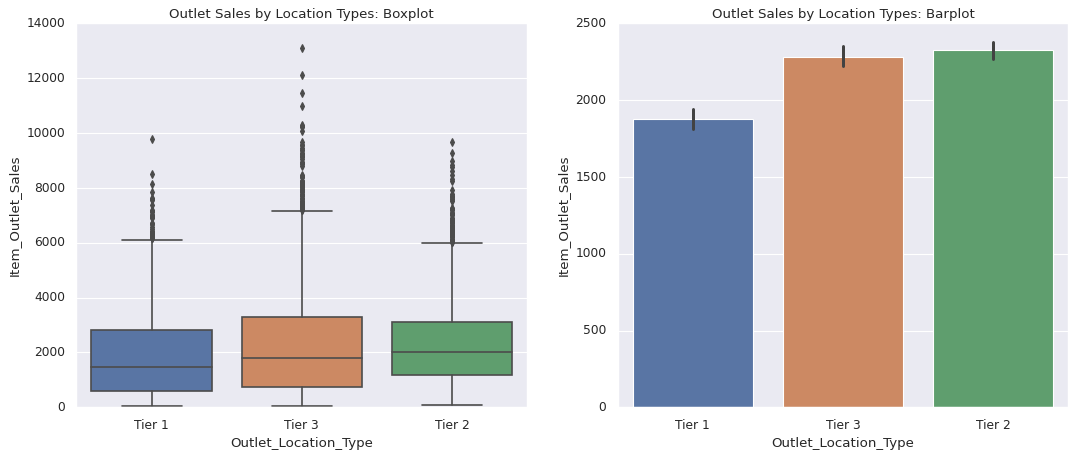

In [78]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (16,6))

#Boxplot:
plt.subplot(1,2,1);
sns.set(rc={'figure.figsize':(9,7)});
sns.boxplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Location Types: Boxplot');

#Barplot:
plt.subplot(1,2,2);
sns.set(rc={'figure.figsize':(9,7)});
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Location Types: Barplot');


**Observations:**
- In the boxplot, we can see that Tier 3 has more spread out outliers. This means that Tier 3 locations have done the largest sale of any other location.  
- In the barplot, we see that Tier 2 has the most sales on average, even slightly more than Tier 3. 
- In the boxplot we can see that Tier 1 has a slightly higher maximum than Tier 2, but on average (see in the barplot) it has done fewer sales. 

####Outlet Sales and Outlet Types:

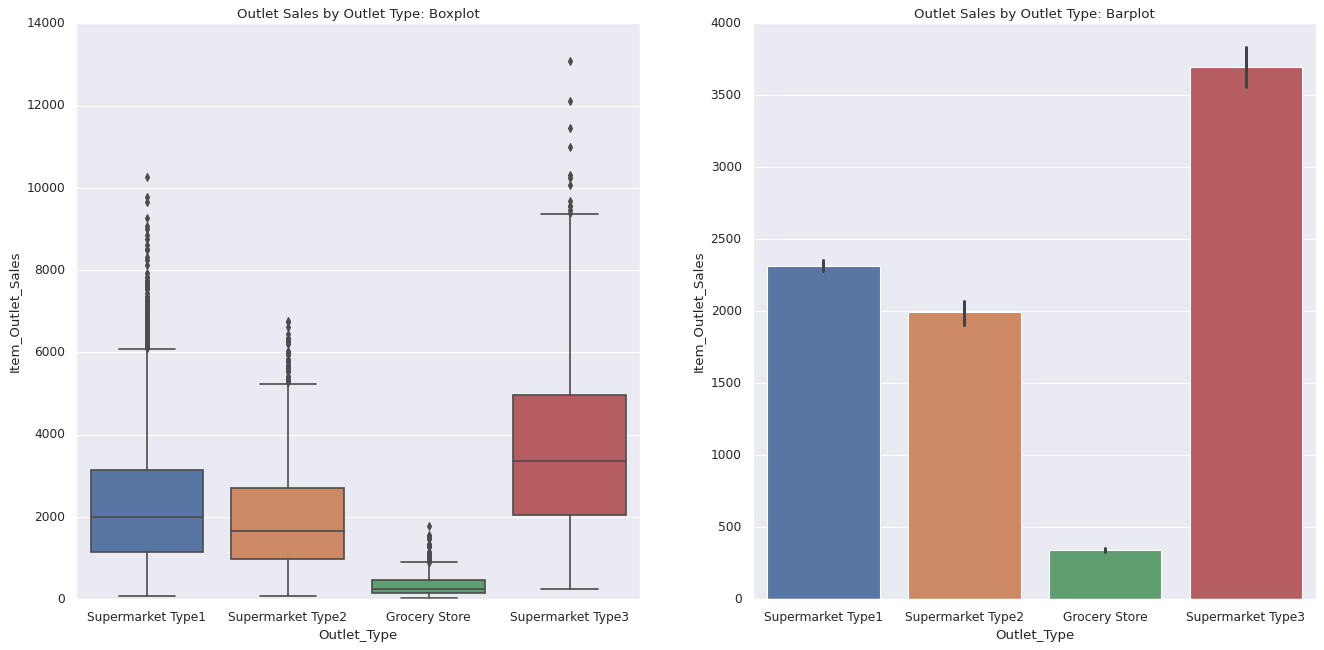

In [79]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (20,9))

#Boxplot
plt.subplot(1,2,1);
sns.set(rc={'figure.figsize':(9,7)});
sns.boxplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Outlet Type: Boxplot');

#Barplot
plt.subplot(1,2,2);
sns.set(rc={'figure.figsize':(9,7)});
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Outlet Type: Barplot');

**Observations:**
- In the boxplot, we can see that Supermarket Type 3 does the most sales of all the other Outlet types, including some of the largest sales as well. 
- In both plots, we can see that Grocery Stores have some the least amount of sales, including the smallest average. 
- All Outlet types have outliers. 

## Explanatory Visuals

###Price - Sales Relation with Low & Regular Fat Content


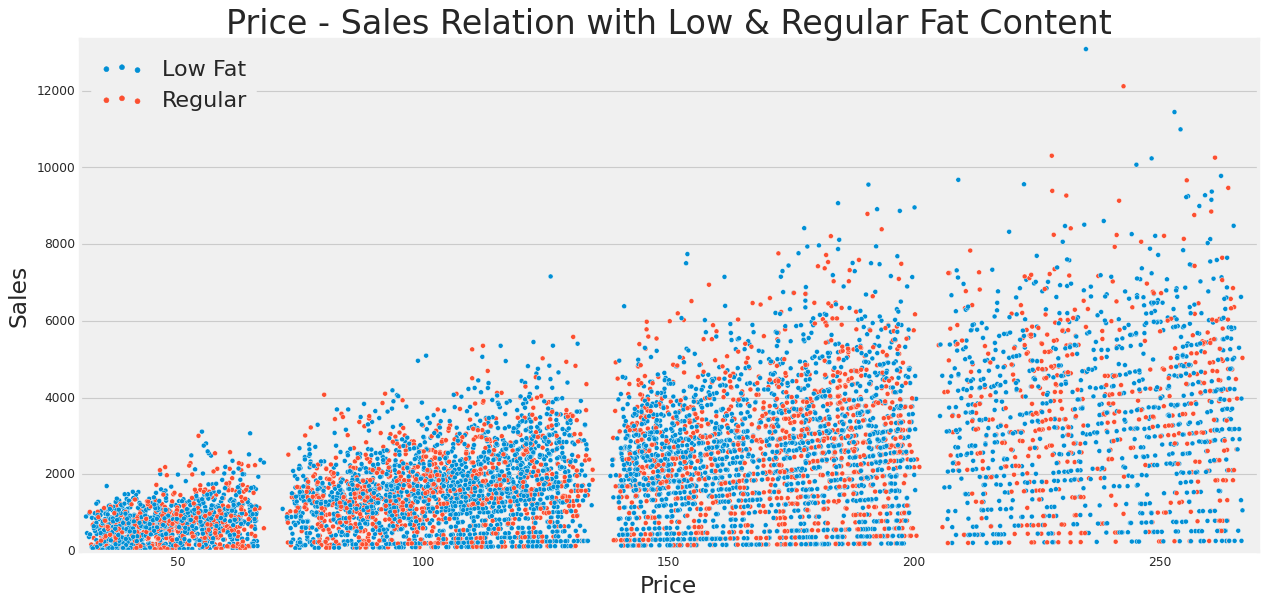

In [80]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (19,8))

#Selecting a style for the graph:
plt.style.use('fivethirtyeight')

#Scatter plot:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content')

#Customing the graph for presentation:
plt.ylim(bottom = 0, top = 13350)
plt.xlim(left = 30, right = 270)
plt.grid(axis = 'x')
plt.xlabel('Price', fontsize=21)
plt.ylabel('Sales', fontsize=21)
plt.title('Price - Sales Relation with Low & Regular Fat Content', fontsize = 30)
plt.legend(loc = 'top left',fontsize = 20);

**At every price, every type of fat content item has does some amount of sale.**

###Total Sales in different types of Outlets

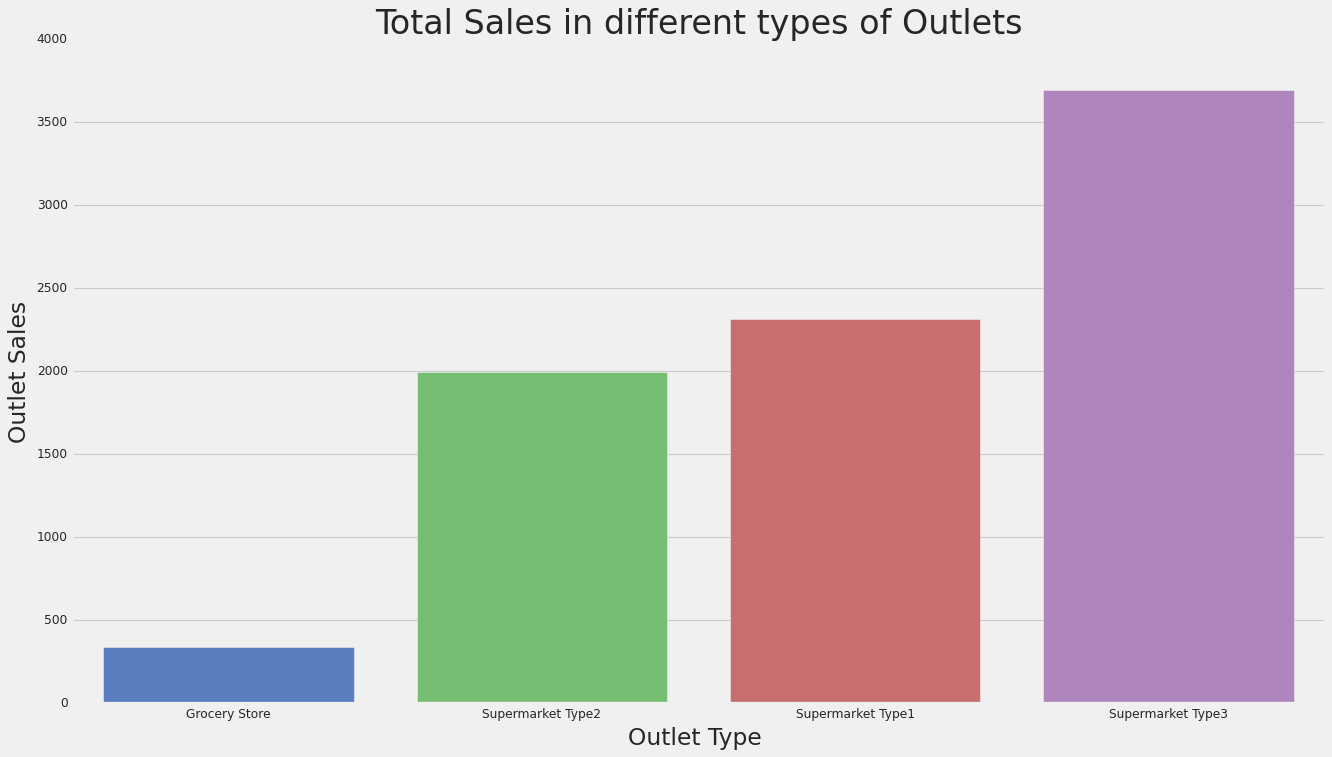

In [81]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (18,10))

#Selecting a style for the graph:
plt.style.use('seaborn-muted')

#Barplot:
sns.barplot(x = 'Outlet_Type', 
            y = 'Item_Outlet_Sales',
            ci = None,
            data = df,
            order = ['Grocery Store', 'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3'])

#Making the graph more presentable:
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales in different types of Outlets', fontsize=30)
plt.xlabel('Outlet Type ', fontsize=21)
plt.ylabel('Outlet Sales', fontsize=21);

**Supermarket Type 3 gets that most sales of all other outlet types.**

###Different Fat content prices in various Outlets

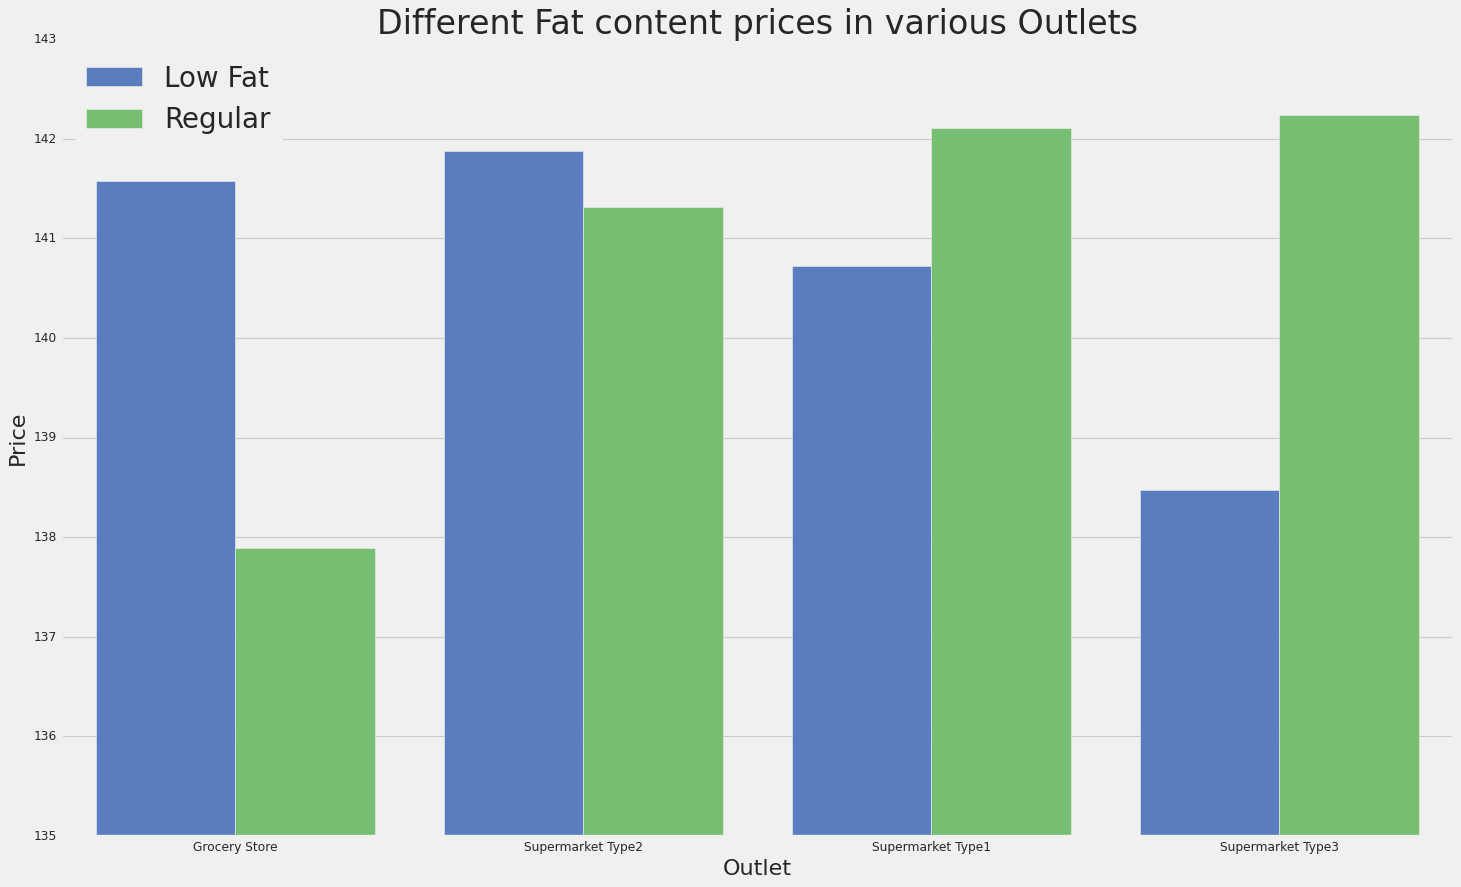

In [82]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (20,12))

#Choosing a style for the graph:
plt.style.use('seaborn-muted')

#Barplot
sns.barplot(x = 'Outlet_Type', y = 'Item_MRP', data = df, hue = 'Item_Fat_Content', ci = None,
            order = ['Grocery Store', 'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3'])

#Making the graph more presentable:
plt.ticklabel_format(style='plain', axis='y')
plt.title('Different Fat content prices in various Outlets', fontsize=30)
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(bottom = 135, top = 143)
plt.legend(fontsize = 25, loc = 'top left');

**Supermarket Type 1 and 3 have higher priced Regular fat content items.**

###Price of Items with Low or Regular Fat Content

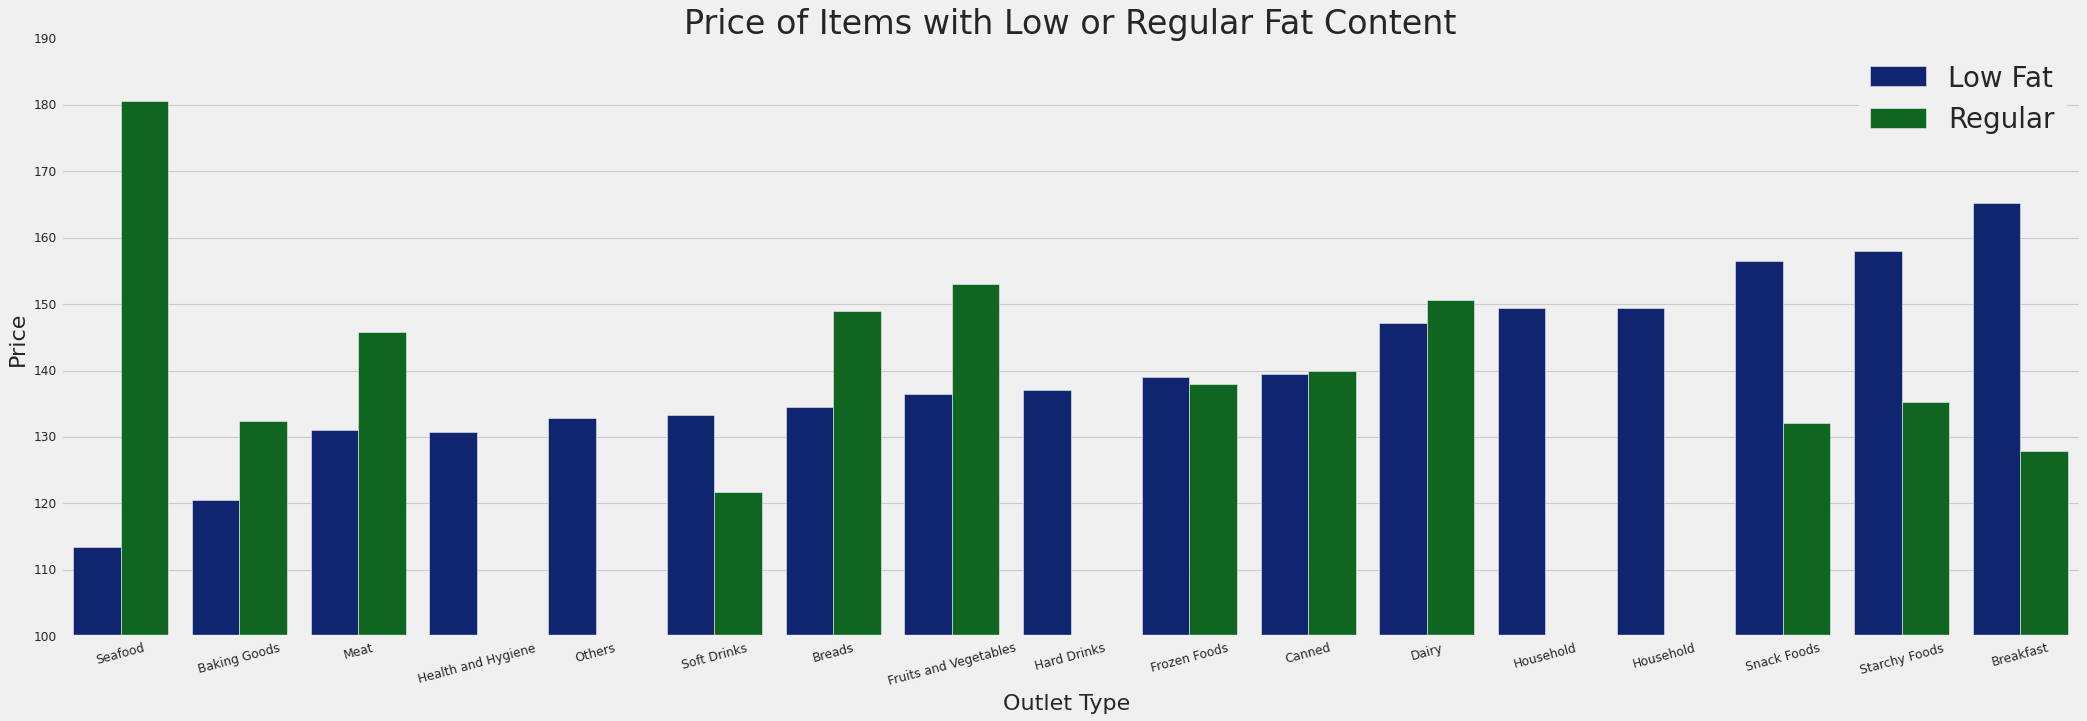

In [83]:
#Selecting a figure size for the graph: 
plt.figure(figsize = (29,9))

#Choosing a style for the graph:
plt.style.use('seaborn-dark-palette')

#Barplot
sns.barplot(x = 'Item_Type', y = 'Item_MRP', data = df, hue= 'Item_Fat_Content', ci = None,
            order = ['Seafood','Baking Goods','Meat','Health and Hygiene','Others','Soft Drinks','Breads','Fruits and Vegetables','Hard Drinks','Frozen Foods','Canned','Dairy','Household','Household','Snack Foods','Starchy Foods','Breakfast'])

#Making the graph look more presentable:
plt.xticks(rotation = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price of Items with Low or Regular Fat Content', fontsize=30)
plt.xlabel('Outlet Type ', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(bottom = 100, top = 190)
plt.legend(loc= 'top left',fontsize = 25);


**There is a Low Fat content option available for every item in the store, while some items don't have any Regular Fat content items.**

##**Machine Learning**

###Imports

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram');

###Loading Data

In [85]:
eda_df = pd.read_csv('/content/sales_predictions.csv')

eda_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
eda_df.shape

(8523, 12)

###Looking for Duplicates

In [87]:
eda_df.duplicated().sum()
#no duplicates

0

###Missing Values

In [88]:
eda_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The missing values in Item Weight and Outlet_Size will be dealt with Simple Imputer
Our target value has not missing values so we are good. 

###Inconsistencies

####Before we saw there were inconsistencies in Item_Fat_Content, so I will be fixing that. 

In [89]:
eda_df.replace({'Item_Fat_Content' :{'Low Fat': 'Low Fat',
                                 'LF':'Low Fat',
                                 'low fat': 'Low Fat',
                                 'reg': 'Regular'}}, inplace = True)

In [90]:
eda_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Creating Features and Targets

In [91]:
X = eda_df.drop(columns = 'Item_Outlet_Sales')

y = eda_df['Item_Outlet_Sales']

In [92]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [99]:
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

###Train Test Split

In [93]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 420)

###Column Selectors

In [95]:
#numeric selector
num_selector = make_column_selector(dtype_include= 'number')

#categorical selector
cat_selector = make_column_selector(dtype_include= 'object')

###Instantiating the Simple Imputer

In [100]:
#Numeric Imputer
mean_imputer = SimpleImputer(strategy= 'mean')

#Categorial Imputer
most_freq_imputer = SimpleImputer(strategy='most_frequent')

Choosing Mean for the numeric columns as it will impute a balanced number in the null values.
Choosing Most_Frequent values for the object columns to fill there respective null values as it is the best way to create a more complete dataset. 

###Instantiate StandardScaler and One Hot Encoder

In [97]:
#StandardScaler
scaler = StandardScaler()

#One Hot Encoder
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

###Creating a Pipeline

In [101]:
#Pipeline for number columns
numeric_pipeline = make_pipeline(mean_imputer, scaler)

numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [102]:
#Pipeline for categorical columns
categorical_pipeline = make_pipeline(most_freq_imputer, ohe)

categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

###Column Transform

####Creating Tuples for Column Transform 

In [110]:
#Number Tuple
num_tuple = (numeric_pipeline, num_selector)

#Categorical Tuple
cat_tuple = (categorical_pipeline, cat_selector)

####Instantiating Preprocessor

In [111]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb246112bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb246112c50>)])

###Fitting Preprocessor to X_train

In [112]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb246112bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb246112c50>)])

###Transform the X_train and X_test data.

In [117]:
X_train_processed = preprocessor.transform(X_train)

X_test_processed = preprocessor.transform(X_test)

In [118]:
print("X_train has", np.isnan(X_train_processed).sum().sum(), "missing values")
print("X_test has", np.isnan(X_test_processed).sum().sum(), "missing values")

print("\n")
print('The X_train has:', X_train_processed.dtype)
print('The X_test has:', X_test_processed.dtype)

print("\n")
print('The shape of X_train is', X_train_processed.shape)
print('The shape of X_test is', X_test_processed.shape)

print("\n")
print("X_train_processed example:")
print(X_train_processed[3:6])

print("\n")
print("X_test_processed example:")
print(X_test_processed[5:8])

X_train has 0 missing values
X_test has 0 missing values


The X_train has: float64
The X_test has: float64


The shape of X_train is (6392, 1594)
The shape of X_test is (2131, 1594)


X_train_processed example:
[[-0.98758449  0.43373385 -0.29289017 ...  1.          0.
   0.        ]
 [-0.17270616  1.61409657 -0.58413135 ...  1.          0.
   0.        ]
 [ 0.59604698  0.15091302 -0.78659882 ...  1.          0.
   0.        ]]


X_test_processed example:
[[-1.13778703 -0.63890874  0.21458807 ...  0.          0.
   0.        ]
 [-1.6487122   1.66986952  0.21192724 ...  0.          1.
   0.        ]
 [ 0.91537521  0.08946753  1.23186516 ...  1.          0.
   0.        ]]
